In [1]:
import sys
sys.path.append("./../utils/")
sys.path.append("./../")
from sklearn.preprocessing import StandardScaler
from datetime import datetime

#Modules of src folder
from tools import dotdict
import run_non_deepl
%matplotlib inline

In [2]:
args = dotdict({})
args.model_params = dotdict({})
args.train_params = dotdict({})

args.experiment_name = "Exp0"

# Data loading
args.from_raw = True
args.file_name = "smard_data.csv"
from_raw_folder = "raw" if args.from_raw else "preproc_non_deepl"
args.path = f"./../data/{from_raw_folder}/{args.file_name}"

# Preprocessing
args.scaler_name = "std"
args.scaler = {"std":StandardScaler()}[args.scaler_name]

# Model and its hyperparameters
args.model_name = "xgb"
args.model_params = None
args.train_params = None

# Prediction
args.forecast_setting = "both"
args.cols_to_lag = ['load', 'solar_gen', 'wind_gen']
args.targets = [['load'], ['solar_gen'], ['wind_gen'], ['load', 'solar_gen', 'wind_gen']]
args.window_size = 24
args.stride = 1 # Has to be <= min(window_size, forecast_horizon) and stride * integer = window_size,
# and stride * integer2 = forecast_horizon
args.lead_time = 0 # TODO: Not working yet
args.forecast_horizons = [24, 48, 96, 192, 336, 720]

# Plotting
args.plot = False
args.plot_date = '2021-07-01'
args.days = 10

# Save model
args.save_model = False
args.save_benchmark = False
args.date_time = datetime.now().strftime("%m-%d-%H")

print(args.from_raw)

True


------- Starting to train ftboth xgb on ['load'] for horizons [24, 48, 96, 192, 336, 720] ----------


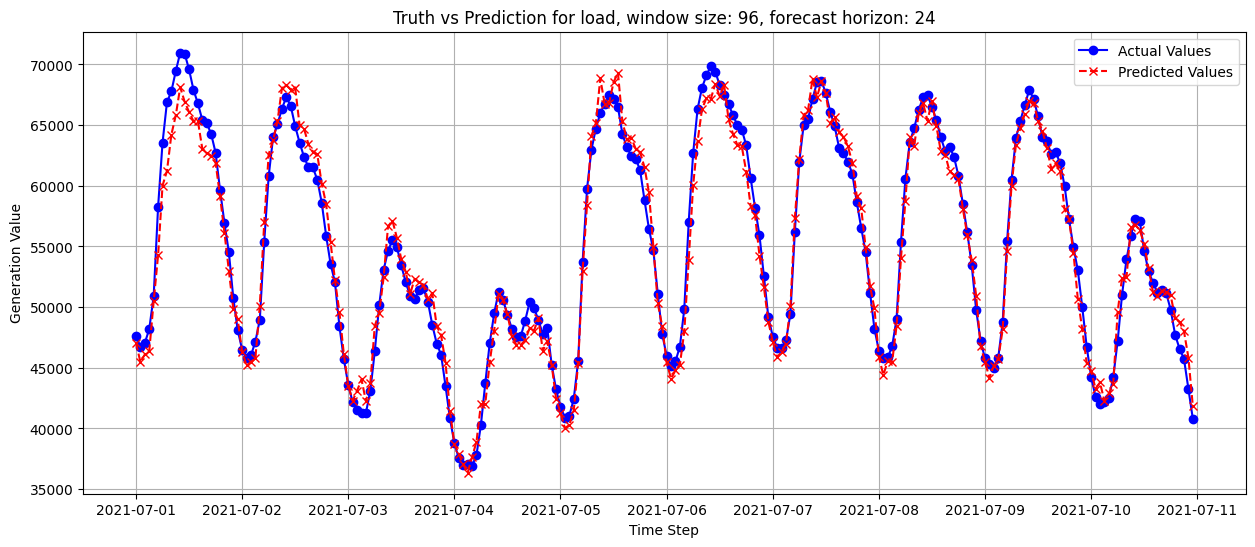

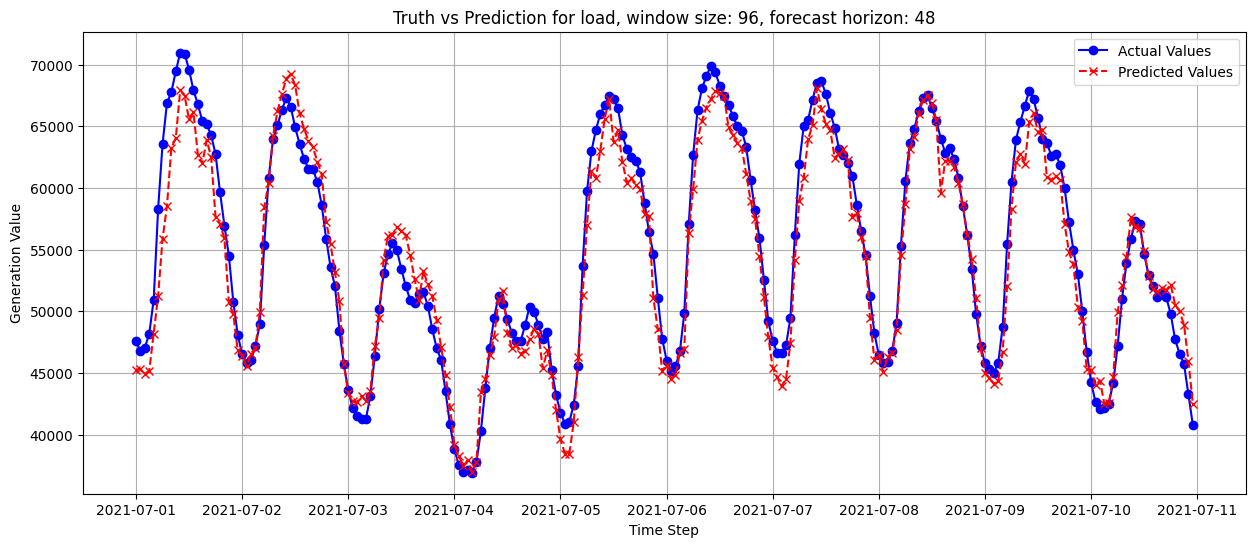

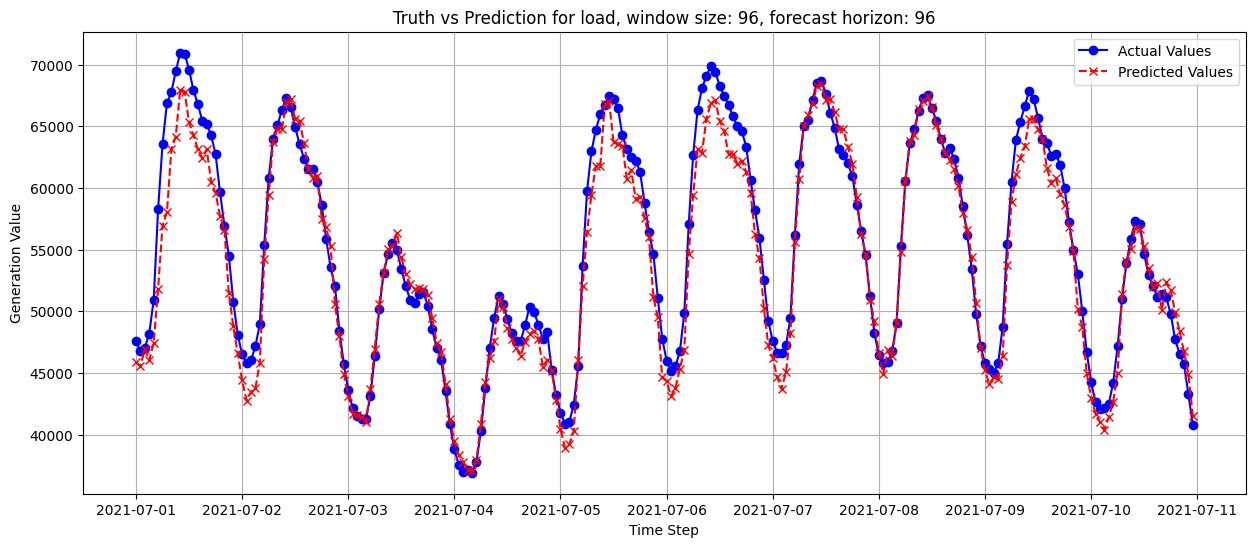

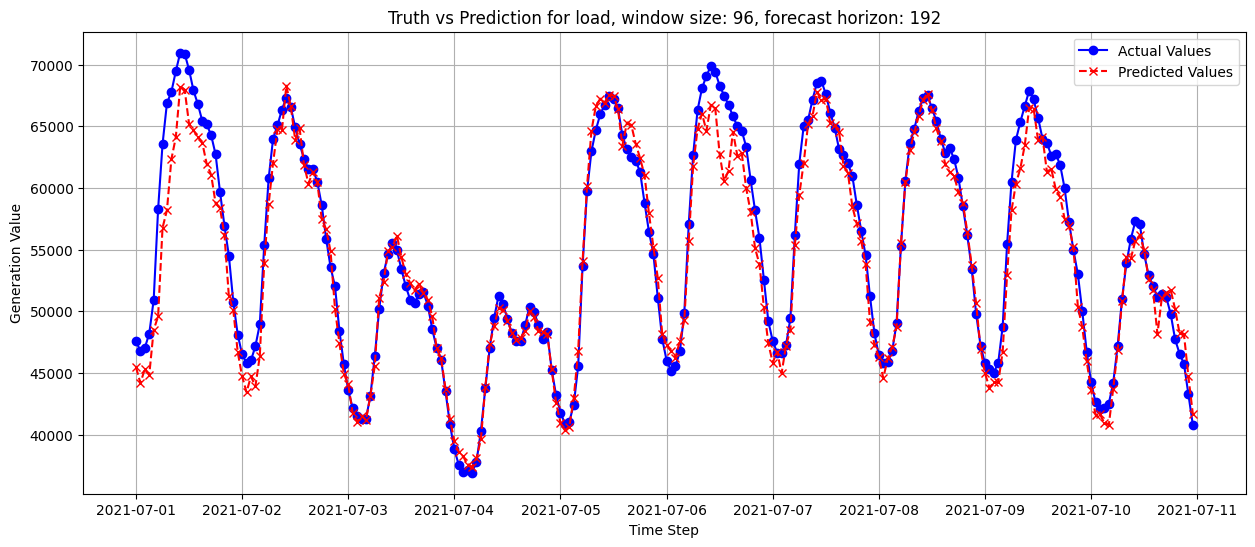

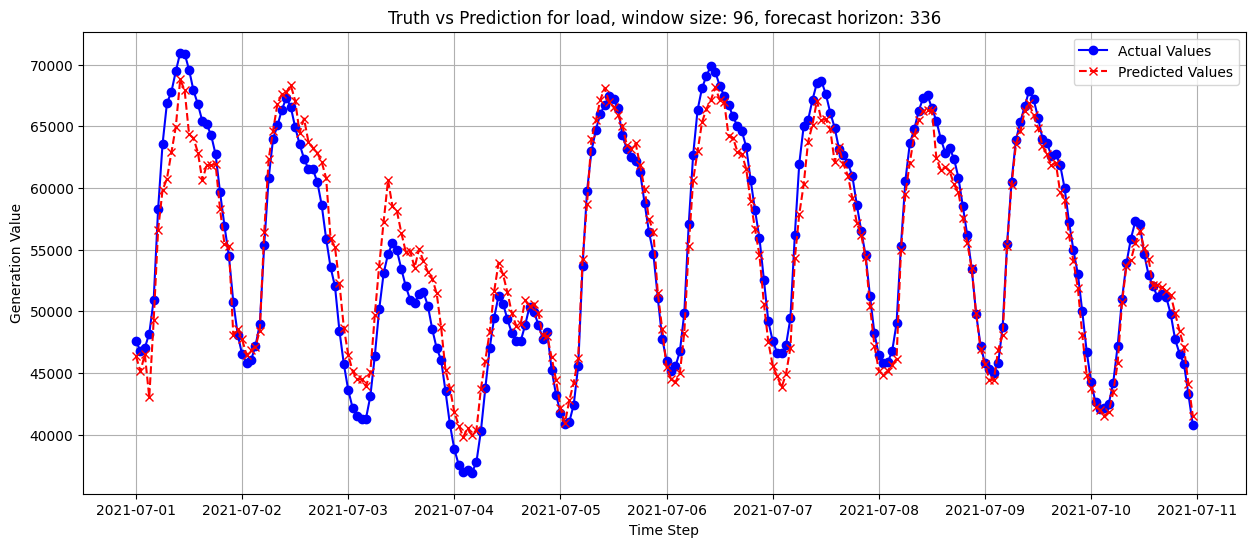

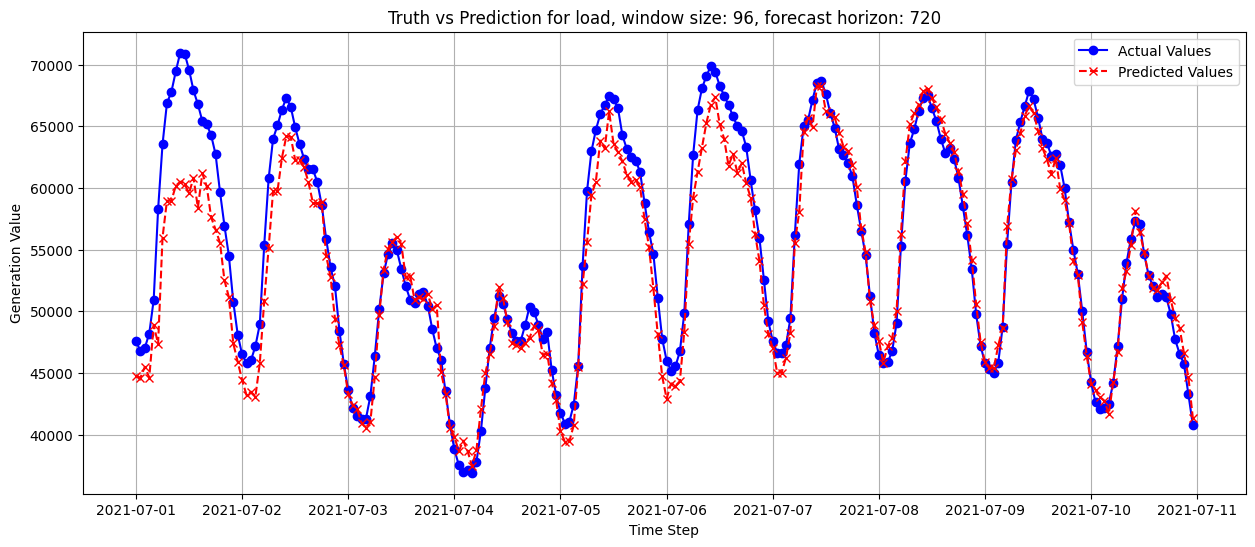

------- Starting to train ftboth xgb on ['solar_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------


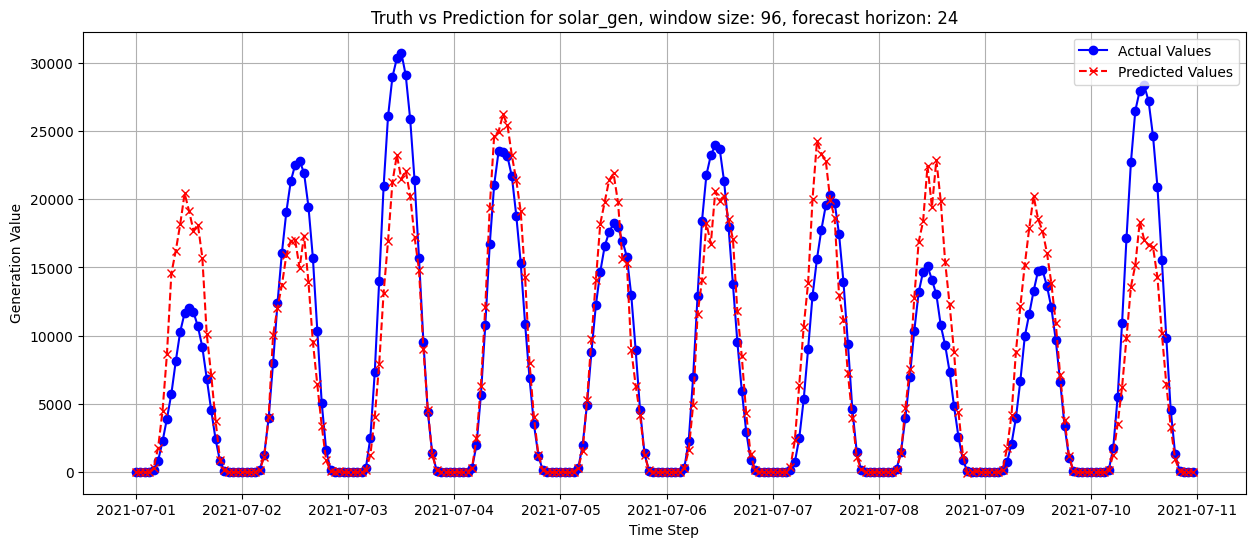

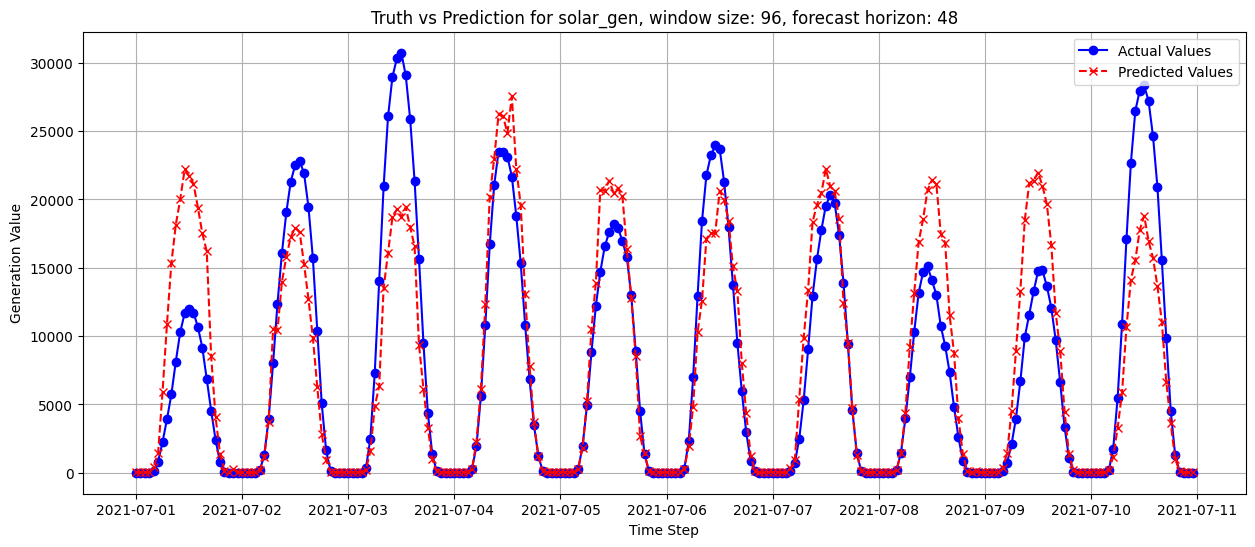

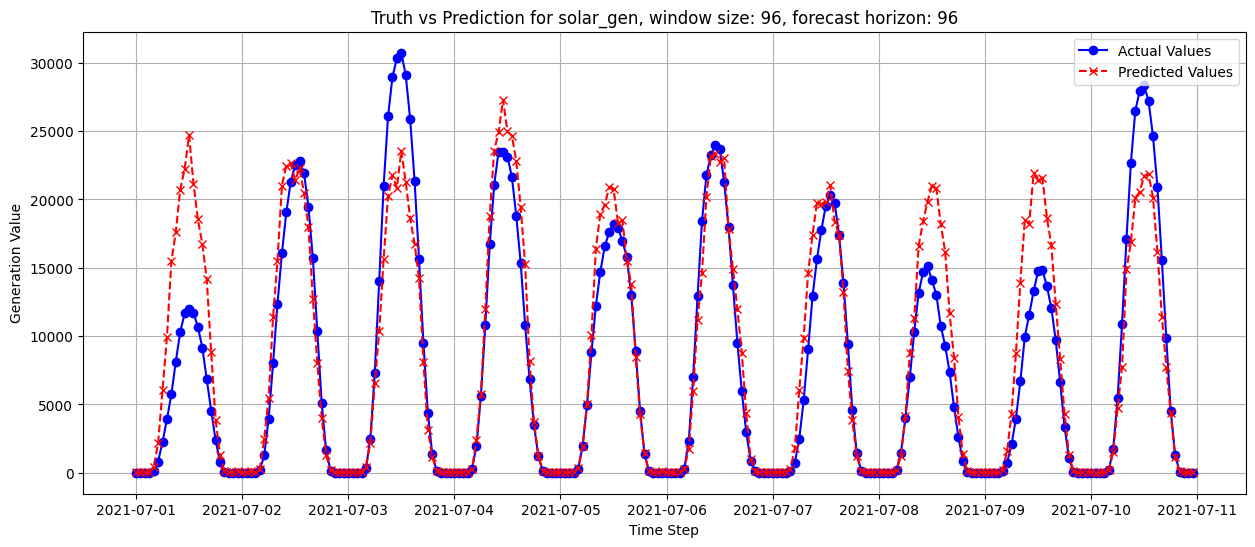

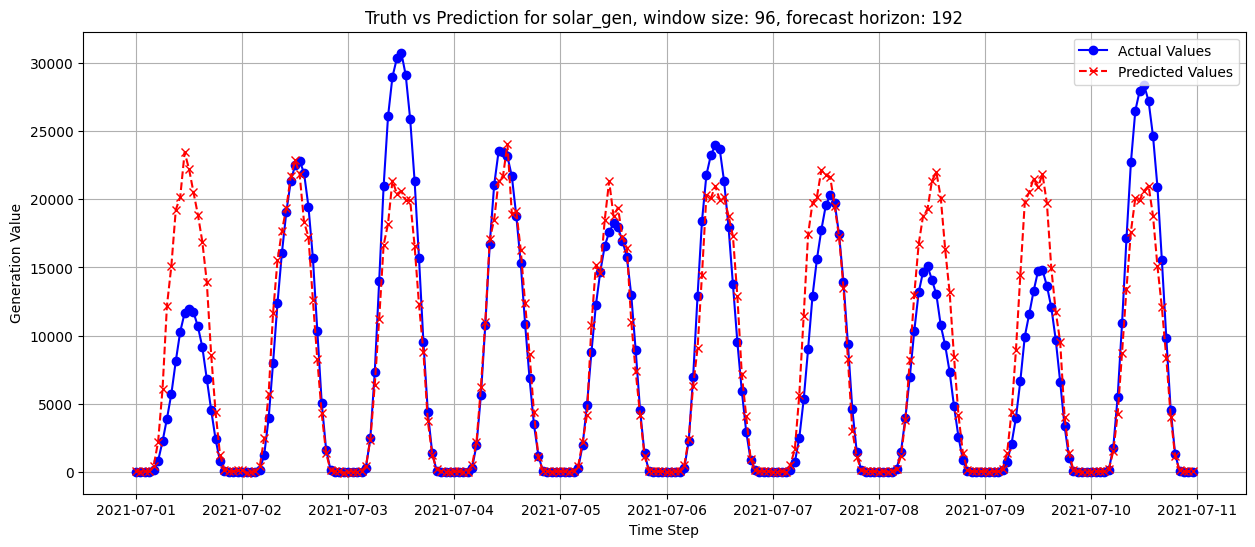

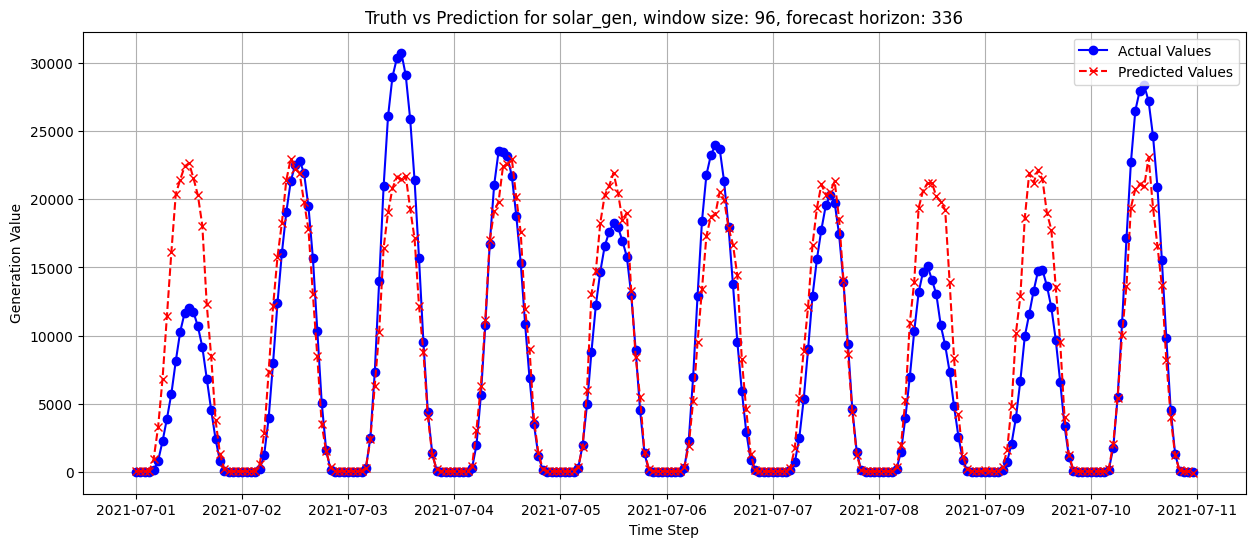

In [3]:
run_non_deepl.pipeline(args)